Imports

In [164]:
%reset -f

import matplotlib.pyplot as plt
import numpy as np

Simulation of 4 cars with a front car with constant velocity plus a sin function and $b=1,c=1, T=3$.

In [165]:
#Defining variables
# Define number of cars including the leader.
#number_of_cars = 2
omega = 2
number_of_cars = 4 
b,c=0.8,0.4
T=2
# Defining starting positions
#position = [[2],[0]]
position = [[84],[56],[28],[0]]
#velocity = [[2],[2]]
velocity = [[28],[28],[28],[28]]
relative_position = []
for i in range(number_of_cars-1):
    relative_position.append([])
    relative_position[i].append(position[i][0]-position[i+1][0])

Formular for speed of leading car and accelaration:

In [166]:
#Speed of leading car
def v_f(t,omega):
    return 28+np.cos(omega*t)

#Defining the accelaration function by the PD controller
def acc(d,v_self,v_front,T_local):
    return b*(v_front-v_self)+c*(d-v_front*T_local)

Simulation code using eulers method.

In [167]:
time_steps = 100000
time_period = 60
step_size = time_period/time_steps

# Using eulers method
for i in range(time_steps):
    for j in range(number_of_cars):
        position[j].append(position[j][i] + velocity[j][i]*step_size)
        if j != 0:
            relative_position[j-1].append(position[j-1][i] - position[j][i])
        if j == 0:
            velocity[j].append(v_f((i*step_size),omega))
        else:
            a = acc(relative_position[j-1][i],velocity[j][i],velocity[j-1][i],T)
            velocity[j].append(velocity[j][i] + a*step_size)

Plotting

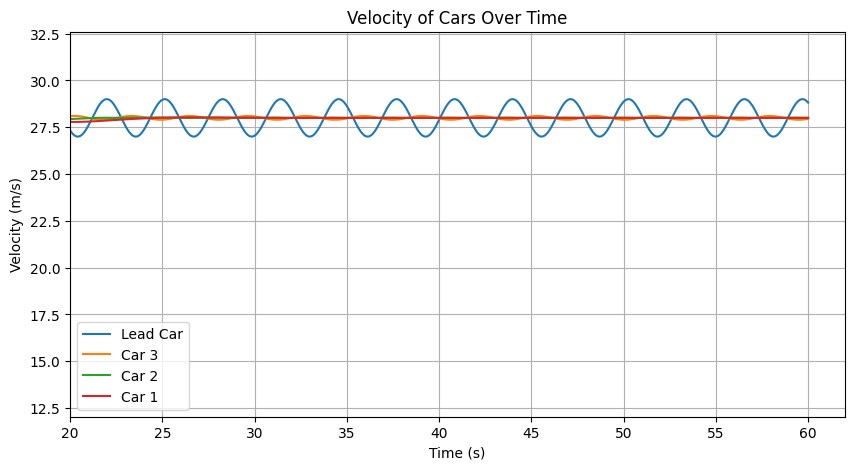

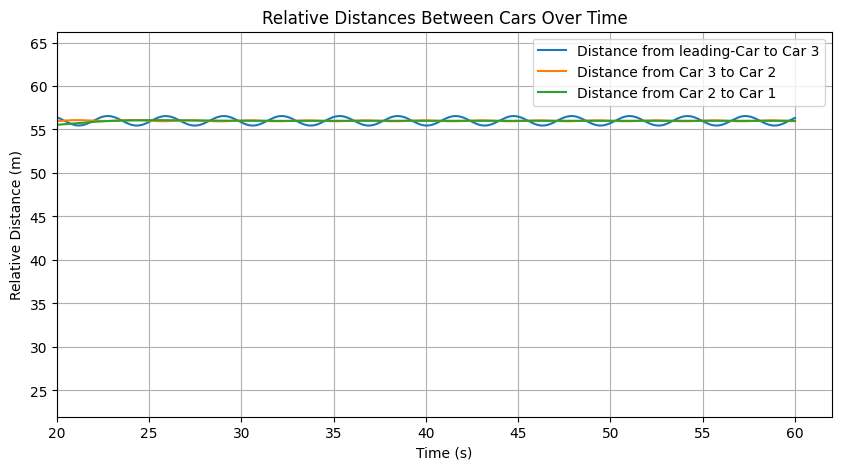

In [168]:
# Create time array
time = [i * step_size for i in range(time_steps+1)]

# Plot velocities
plt.figure(figsize=(10, 5))
for i in range(number_of_cars):
    if i == 0:
        plt.plot(time, velocity[i], label="Lead Car")
    else:
        plt.plot(time, velocity[i], label="Car "+str(number_of_cars-i))
plt.title("Velocity of Cars Over Time")
plt.xlabel("Time (s)")
plt.ylabel("Velocity (m/s)")
plt.legend()
plt.grid(True)
plt.xlim(20, time_period+2) 
plt.ylim(min(min(row) for row in velocity)-0.1*max(max(row) for row in velocity), 1.1*max(max(row) for row in velocity))  

plt.show()
plt.show()

# Plot relative distances
plt.figure(figsize=(10, 5))
for i in range(number_of_cars-1):
    if i == 0:
        plt.plot(time, relative_position[i], label="Distance from leading-Car to Car "+str(number_of_cars-1))
    else:
        plt.plot(time, relative_position[i], label="Distance from Car "+str(number_of_cars-i)+" to Car "+str(number_of_cars-i-1)) 
plt.title("Relative Distances Between Cars Over Time")
plt.xlabel("Time (s)")
plt.ylabel("Relative Distance (m)")
plt.legend()
plt.grid(True)
plt.xlim(20, time_period+2) 
plt.ylim(min(min(row) for row in relative_position)-0.1*max(max(row) for row in relative_position), 1.1*max(max(row) for row in relative_position))  

plt.show()
